Oppimispäiväkirjan koodidemoihin tarvittavat installit


In [ ]:
!pip install numpy
!pip install pandas
!pip install scrapy
!pip install sklearn
!pip install scipy
!pip install matplotlib
!pip install bs4
!pip install nltk
!pip install holoviews

Oppimispäiväkirjan koodidemoihin tarvittavat importit

# Viikko 1

**Oppimistavoitteet:** 

Tavoitteena on aloittaa informaatioanalytikaan sivuaineen opinnot datatieteiden perusteilla. Tavoitteena on oppia mitä on datatiede, mitä eri työkaluja datatieteissä käytetään, miten niitä käytetään ja minkälaisia menetelmiä datatieteisiin kuuluu. Näiden lisäksi uskon saavani myös paremman kuvan datatieteistä ja siitä mitä informaatioanaytiikan sivuaineessa haluan opiskella.

Työskentelen tällä hetkellä John Deerellä ohjelmistohommissa ja rakennamme analytiikkatyökalua metsäkoneiden standardoidun tiedonsiirron tuottamien XML- muotoisten raporttien sisältämän datan käsittelyyn. Tässä työssä pääsen käsittelemenään paljon erilaista dataa ja visualisoimaan sitä erilaisten työkalujen avulla. Tähän mennessä olen käyttänyt pääasiassa vain Power BI:tä ja D3.js kirjastoa, joten esimerkiksi pythonin erilaisiin kirjastoihin yms. en ole vielä juurikaan tutustunut. 

Johdanto Datatieteisiin-kurssi tukee loistavasti toista tässä periodissa käynnissä olevaan kurssia: *Data-analytiikka päätöksenteossa*. Nämä kurssit ja tämänhetkinen työnkuvani tukevat loistavasti toisiaan ja pääsenkin kokeilemaan oppimiani asioita työelämässä, tehostaen omaa oppimistani. 

**Luento osallistuminen:** 

En osallistunut luennolle töiden vuoksi, mutta katsoin luentovideon ja koodiklinikan videon.

**Keskeiset asiat:**

Datatieteiden tekemiseen löytyy lukuisia työkaluja ja niiden valinta voi välillä olla haastavaa. Datatiedettä voi tehdä yksittäisen ohjelmiston sisällä (Power Bi, Tableau) tai ihan suoraan koodina (Python, R). Suurimpana erona näissä on se, että kuinka mukautuvia, helppokäyttöisiä ja muokattavia ne ovat. Pythoniin löytyy todella paljon erilaisia kirjastoja, joilla voi tehdä melkein mitä vaan, mutta toisaalta niiden käyttäminen voi olla haastavaa ja erilaisten kirjastojen dokumentaatiot voivat olla varsin raastavaa luettavaa. 

Moderni datatieteilijä:

- liiketoimintaosaaminen
- ohjelmointi- ja tietokantaosaaminen
- tilastollinen analyysi
- datalähtöinen viestintä ja visualisointi.

Schröer et al. (2021) mukaan CRIPS-DM on 2000-luvulla julkaistu defacto standardi malli datan louhintaan. CRIPS-DM lyhenne tulee sanoista Cross Industry Standard Process for Data Mining (Wikipedia, 2022) Vaikka itsekkin olen työn puolesta analytiikkaprosessia pyörittänyt, oli CRISP-DM myös minulle melko tuntematon malli. Luultavasti jollakin aiemmilla kursseilla esimerkiksi Liiketoimintatiedon hallinta, se saattaa olla ohimennen mainittu, mutta muistikuvat ovat hämäriä

**Oivallukset:**
- Etiikka on erittäin tärkeää, kun päätöksiä yms. tehdään dataan perustuen, Etiikan merkitys korostuu, kun normaalilla ihmisellä harvemmin on halua, aikaa tai taitoa tarkistaa prosessejen tuotoksia.
- Datatieteitä opiskellessa tärkeää on keskittyä menetelmiin, eikä työkaluhin. Uusia työkaluja tulee jatkuvasti enemmän ja enemmän, joten teknologia-agnostisuus on hyvä teoriaa opiskellessa.
- Datatiede tuottaa erilaisia tietotuotteita, mutta arvo luodaan vasta kun tietotuotteita käytetään yleensä ihmisen toimesta.
- Tietojohtamisen opinnot käsittää modernin datatieteilijän osaamistarpeet
-   

**Kehityskohteet ja flippausvinkit:**
- Voisi vaikka ottaa jonkun yksinkertaisen datasetin ja katsella mitä tietoa siitä voisi potentiaalisesti saada irti ja mihin kannattaa kiinnittää huomiota

**Koodidemo:**

In [ ]:
import pandas as pd
import numpy as np
#haetaan suosituimmat etunimet 
URL = 'http://www.avoindata.fi/data/dataset/9625f263-a87b-4ba4-a55d-a2902ec82f0d/resource/5edc3913-91a4-4c30-9d35-a17c80d6104b/download/suosituimmat_etunimet_kunnittain_03072019.xlsx'
#luetaan pandasin dataframeen
df = pd.read_excel(URL)
#tarkastellaan mitä data sisältää
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SYNTYMÄVUOSI   2519 non-null   int64 
 1   SYNTKOTIKUNTA  2519 non-null   int64 
 2   KUNNAN NIMI    2519 non-null   object
 3   SUKUPUOLI      2519 non-null   int64 
 4   ETUNIMI        2519 non-null   object
 5   KPL            2519 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 118.2+ KB


In [ ]:
cols = {'SYNTYMÄVUOSI': 'VUOSI',
        'SYNTKOTIKUNTA': 'KUNTAKOODI',
        'KUNNAN NIMI': 'KUNTA'}
#muutetaan osan sarakkeiden nimet
df.rename(columns=cols, inplace=True)
#pivotoidaan taulu ja tarkastellaan Tampereen suosituinta etunimeä
pivot_df = df.pivot_table(values='ETUNIMI', index='KUNTA', columns='VUOSI', aggfunc='first')
pivot_df.loc['Tampere']

VUOSI
1969      Mika
1970      Mika
1971      Mika
1972      Mika
1973      Jani
1974      Jani
1975      Jani
1976     Mikko
1977     Mikko
1978     Mikko
1979     Mikko
1980     Mikko
1981     Mikko
1982     Mikko
1983     Mikko
1984     Antti
1985     Ville
1986     Mikko
1987     Ville
1988     Ville
1989     Mikko
1990     Mikko
1991     Teemu
1992     Ville
1993     Mikko
1994     Ville
1995     Ville
1996    Aleksi
1997    Aleksi
1998    Aleksi
1999    Aleksi
2000     Lauri
2001    Aleksi
2002     Elias
2003     Lauri
2004    Matias
2005     Elias
2006    Niklas
2007     Veeti
2008      Eetu
2009     Lauri
2010      Onni
2011      Onni
2012    Aleksi
2013       Leo
2014     Elias
2015    Daniel
2016       Leo
2017       Leo
2018      Eeli
2019       NaN
Name: Tampere, dtype: object

**Aineisto:**

Schröer, C. et al. (2021) ‘A Systematic Literature Review on Applying CRISP-DM Pro-cess Model’, Procedia Computer Science, 181, pp. 526–534. doi:10.1016/j.procs.2021.01.199.

Wikipedia (2022) ‘Cross-industry standard process for data mining’, Wikipedia. Available at: https://en.wikipedia.org/w/index.php?title=Cross-industry_standard_process_for_data_mining&oldid=1081205231 (Accessed: 8 May 2022).

School Of Data Science (2017) ‘What Skills Do I Need to Become a Modern Data Sci-entist?’, Amsterdam School of Data Science. Available at: https://www.schoolofdatascience.amsterdam/news/skills-need-become-modern-data-scientist/ (Accessed: 8 May 2022).

# Viikko 2

**Luento osallistuminen:** 

En osallistunut luennolle töiden vuoksi, mutta katsoin luentovideon ja koodiklinikan

**Keskeiset asiat:**

Analytiikka voidaan jakaa neljään osa-alueeseen. Osa-alueet ovat melko selkeät, mutta halusin vielä aukaista niitä sateeseen liittyvillä esimerkeillä ymmärtääkseni itse paremmin.
- Kuvaileva analytiikka
  - Mitä on tapahtunut? Satoi vettä
- Diagnosoiva analytiikka
  - Miksi näin on tapahtunut? Vettä on haihtunut ilmakehää riittävästi ja se on tiivistynyt ilmakehässä
- Ennakoiva analytiikka
  - Mitä tulee tapahtumaan? Huomenna sataa vettä
- Ohjaava analytiikka
  - Mitä asialle pitäis tehdä? Ottaa sateenvarjo mukaan 

Scraperit ja crawlerit mahdollistavat kaikenlaista datan keruuta, joka ei muuten välttämättä olisi mahdollista. Aina se ei kuitenkaa ole sallittua hyvänä esimerkkinä facebook, joka kieltää lähes kaiken raavinnan ja ryöminnän. Kiellot löytyvät usein robots.txt tiedostoista. Robots.txt tiedostoja seuraamalla ei ainakaan tule tehtyä mitää eettisesti väärin, eikä voi joutua oikustoimien kohteeksi. 

- Ryömintä = nettisivujen löytäminen
- Raavinta = datan kerääminen nettisivuilta

Ensin haetaan (ryömitään) URL:t joista ladataan HTML tiedostot, sen jälkeen näistä HTML tiedostoista kerätään (raavitaan) tarvittava data. Projekteissa siis yleensä käytetään molempia tekniikoita. 

**Oivallukset:**
- Tietojohtaja on generalisti, liian tarkka erikoistuminen voi olla huono asia, varsinkin johtamistehtäviä silmällä pitäen
- Scraperit ja crawlerit mahdollistaa datan keräämisen suoraan HTML sivuilta, vaikka dataa ei olisikaan tarkoitettu käytettäväksi
- Vaikka analytiikka voidaan jakaa nelikenttään, kyseessä ei suoranaisesti ole nelikenttä, sillä näillä kentillä on hierarkia. Asioita ei voida diagnosoida, jos ei tiedetä, että jotain on tapahtunut. Vastaavasti ohjaavaa analytiikkaa on hankala tehdä ilman ennakoivaa analytiikkaa. Nämä osa-alueet siis ovat varsin tiukasti sidonnaisia.
- Data itsessään ei välttämättä anna kilpailuetua, vaan se mitä datalla tekee. Jos datan jakamisella ei ole negatiivisia vaikutuksia kilpailuetuun tai yritykseen, datan jakaminen on lähtökohtaisesti kannattavaa.
- Datatiede ja analytiikka alkaa olemaan yrityksissä 'must have' eikä enään 'nice to have'

**Kehityskohteet ja flippausvinkit:**

**Koodidemo:** Tehty Scrapyn dokumentaation perusteella, yksinkertainen ryömijä ja raapija quotejen hakemiseen

In [ ]:
!scrapy genspider quotes fi.wikiquote.org

/content/quotes.py already exists


Seuraavan koodinpätkän kun laittaa quotes.py tiedostoon, nii saa mäkikotkien quoteja kivasti

In [ ]:
import scrapy

class QuotesSpider(scrapy.Spider):
  name = 'quotes'
  allowed_domains = ['fi.wikiquote.org']
  start_urls = [
          'https://fi.wikiquote.org/wiki/Matti_Nyk%C3%A4nen',
          'https://fi.wikiquote.org/wiki/Janne_Ahonen'
  ]

  def parse(self, response):
      quotes = response.xpath('//*[@class="mw-parser-output"]/ul/li/text()').getall()
      for i, x in enumerate(quotes):
        result = x[1:].split('"')
        if result[0]:
          quote = {i : result[0]}
        yield quote

In [ ]:
!scrapy runspider quotes.py -o quotes.json

2022-05-10 20:33:08 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-05-10 20:33:08 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.7.13 (default, Apr 24 2022, 01:04:09) - [GCC 7.5.0], pyOpenSSL 22.0.0 (OpenSSL 3.0.3 3 May 2022), cryptography 37.0.2, Platform Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
2022-05-10 20:33:08 [scrapy.crawler] INFO: Overridden settings:
{'SPIDER_LOADER_WARN_ONLY': True}
2022-05-10 20:33:08 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2022-05-10 20:33:08 [scrapy.extensions.telnet] INFO: Telnet Password: 73da30190d721dfb
2022-05-10 20:33:08 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2022-05-10 20:33:08

**Aineisto:** 

https://docs.scrapy.org/en/latest/intro/tutorial.html

https://fi.wikiquote.org/wiki/Matti_Nyk%C3%A4nen

https://www.facebook.com/robots.txt

# Viikko 3

**Luento osallistuminen:** 

En osallistunut luennolle töiden vuoksi, mutta katsoin koodiklinikan videon ja luin luennon esitysmateriaalit

**Keskeiset asiat:**

Koneoppiminen on sitä, kun tietokonejärjestelmä oppii päätymään haluttuihin lopputuloksiin datan perusteella. Tekoäly puolestaan on sitä, että kone reagoi älykkäästi ympäristöönsä. Koneoppiminen on kuitenkin tärkeä osa tekoälyä, sillä älykäs reagointi ympäristöön tarvitsee myös koneoppimista. Vaikka koneoppiminen on kovassa nosteessa ja monet yritykset ja organisaatiot pyrkivät hyödyntämään koneoppimista toiminnassaan, koneoppiminen ei kuitenkaa ole oikotie onneen. Sen avulla ei esimerkiksi voida korvata toimivaa liiketoimintaa.

Koneoppimista varten data pitää käsitellä ja datasta erottaa piirteet koneen ymmärrettävään muotoon, eli yleensä numeroiksi. Data pitää harmonisoida, siistiä epämääräisyyksistä ja turha karsitaan pois. Tarvittaessa dataan voidaan myös lisätä piirteitä. 

Ohjattu oppiminen
- Syöte, josta tunnistetaan oikea luokka opetusaineiston mukaan

Ohjaamaton oppiminen
- Etsitään datasta rakenne, muodostetaan klustereita

Vahvistusoppiminen
- Havainnoi ympäristö -> toimii tilanteen mukaan -> ympäristön palaute
- etsitään eniten positiivista palautetta tuottava ratkaisu

**Oivallukset:**
- Koneoppimine on hyvä lisä toimivan yrityksen päälle
- Tutkimusmetodologian kurssilla otantamenetelmissä esiin nousi se, että mitä isompi otanta, sitä enemmän aikaa ja rahaa sen käsittelyyn menee. Toki otannan keruuseen koneoppimisesta ei välttämättä ole hyötyä, mutta aineiston käsittelyssä koneoppiminen voi nopeuttaa ja tehostaa hommaa todella paljon.
- Algoritmejä on runsaasti ja ne toimivat tilanteesta riippuen eri tavalla, valintaan vaikuttaa esim. datan määrä, puhtaus, saatavilla oleva suoritusteho yms.
- Dataa käsiteltäessä on tärkeää, että ei vahingossa tai tahallisesti vaikuta datan oikeellisuuteen
- Koneoppiminen on varsin hyödyllistä monessa eri hommassa, kunhan vaan ymmärtää mitä tekee

**Kehityskohteet ja flippausvinkit:**
- Miten koneoppimisalgoritmi valitaan ja mitä pitää huomioida

**Koodidemo:** koneoppimisen testailut https://machinelearningmastery.com/machine-learning-in-python-step-by-step/ ohjeiden mukaan

In [ ]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


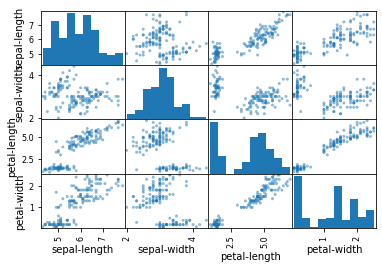

In [ ]:
pd.plotting.scatter_matrix(dataset)
pyplot.show()

In [ ]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(metrics.classification_report(Y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
metrics.confusion_matrix(Y_test, predictions)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

**Aineisto:**

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

https://course.elementsofai.com/fi/4/1

https://fi.wikipedia.org/wiki/Vahvistusoppiminen

# Viikko 4


**Luento osallistuminen:** 

En osallistunut luennolle töiden vuoksi, mutta katsoin luentovideon

**Keskeiset asiat:**

CRISP-DM malli koostuu kuudesta vaiheesta: liiketoiminnan ymmärtäminen, datan ymmärtäminen, datan valmistelu, datan mallinnus, arviointi ja käyttöönotto. Vaikka vaiheet ovat järjestyksessä ja melko tarkasti kuvailtu, voidaan ne suorittaa varsin monella tavalla ja erilaisilla työkaluilla ja menetelmillä. Esimerkiksi arviointi vaiheessa voidaan käyttää erilaisia mittareita, testejä tai käydä keskusteluja arvioinnin suorittamiseksi.

- Liiketoiminnan ymmärtäminen
  - Mitä resursseja on käytettävissä ja mitä tarvitaan, mitkä ovat tiedonlouhinnan tavoitteet, louhintatyyppi ja onnistumiskriteerit.
- Datan ymmärtäminen
  - Datan kerääminen datalähteistä, datan tutkiminen ja kuvailu ja datana laadun tarkastelu. 
- Datan valmistelu
  - Mikä saatavilla olevasta datasta valitaan ja millä kriteereillä, datan siivoaminen, johdettujen ominaisuuksien luonti.
- Datan mallintaminen
  - Miten mallinnetaan, testicaset, parametrien valinta ja mallinuksen valintojen perustelu, mallien arviointi.
- Arviointi
  - Tulosten vertailu määriteltyihin liiketoiminnan tavoitteisiin, tulkinta, koko prosessin tarkastelu.
- Käyttöönotto
  - Lopullinen tietotuote, raportti tai ohjelmistokomponentti. Lopullisen tuotteen julkaisu, seuranta ja ylläpito

Harjoitustyötä tehdessäni oli erittäin haastavaa keksiä mikä liiketoimintaongelmaksi valikoituisi. Vaikka data-analytiikka pitäisi olla ongelma tai kysymyslähtöistä, eikä data lähtöistä, huomasin keskittyväni varsin pitkälti dataan. Toki haasteena oli datan saatavuus, mutta lopulta löysin sopivat datat AirBnB datan lisäksi.

**Oivallukset:**
- oikeet bisnescaset lähtee ongelmasta tai kysymyksestä, johon pyritään vastaamaan
- ongelmien etsintään voi myös käyttää data-analytiikkaa

**Kehityskohteet ja flippausvinkit:**


**Koodidemo:** tavoitteena kartoittaa haasteita, joihin harkkatyössä voisi vastata

In [ ]:
from urllib.request import urlopen, Request
import bs4 as bs

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
URL = 'https://www.highheelsandabackpack.com/airbnb-problems/'
req = Request(url=URL,headers=headers)
html = urlopen(req).read()
soup = bs.BeautifulSoup(html)
result = [(value.text) for value in soup.find_all('h3')]

print(*result[:-4], sep = "\n")


Airbnb Are Just a Third Party 
Airbnb May Cause an Ethical Problem in Certain Cities
Anti Airbnb Attitudes Can Ruin Your Trip
Negative Experiences Have to be REALLY Bad Before You Can Leave 
It’s Difficult to Get Hold of Airbnb as a Matter of Urgency
Disputes Become a “He Said, She Said” 
Airbnb Have Little Concern for Your Safety 
Apartments May Not Adhere to Safety Regulations 
Fire Alarms, Carbon Monoxide Testers, and Other Devices May be Absent 
Reviews May Be Removed or Mysteriously Disappear 
You May be an Illegal Guest 
You Lose the Amenities Offered by Hotels 
You are at the Mercy of Your Hosts 
You Are Not Insured 
Airbnb Service Fees Bump up the Prices  
Big Brother May Be Watching 


#Viikko 5

**Luento osallistuminen:** 

Osallistuin luennolle


**Keskeiset asiat:**

NLP eli Natural Language Processing tarkoittaa koneen kykyä tulkita ihmisen tuottamaa kieltä. NLP on eritysala datatieteissä ja siinä datalähteenä käytetään luonnollista kieltä. NLP:tä hyödyntää esimerkiksi erilaiset älyavustajat kuten Amazon Alexa tai Google Assistant. 

Kuten muussakin koneoppimisessa oleellista on tunnistaa piirteitä ja näistä erotellen muodostaa erilaisia rakenteita. NLP on myös tärkeä osa tekoälyä, sillä monissa tilanteissa, joita tekoälyn pitää pystyä käsittelemään on mukana myös ihmisen tuottamaan kieltä joko tekstinä tai puheena.

Kieli sisältää paljon "kohinaa" eli täytesanoja, joilla ei ole sisällön kannalta merkitystä. Jos merkityksettömät sanat jättää puheesta pois, puhe kuulostaa hassulta, mutta on yleensä ymmärrettävää. Täytesanat helpottavat ja sujuvoittavat ihmisten välistä kommunikaatioita, mutta datatieteen näkökulmasta se on merkityksetöntä. Lisäksi kieli sisältää erilaisia sijapäätteitä (varsinkin suomen kielessä), jotka ovat merkityksettömiä.

**Oivallukset:**
- kieli datalähteenä on varsin haastava käsiteltävä ja vaatii paljon erilaisia toimenpiteitä, että datasta saadaan kone luettavaa
- Mallien opettamisessa tärkeää on, ettei yli- tai aliopeteta, missä menee raja?
- Erilaisiin prosesseihin on saatavilla monia kirjastoja, tässä esimerkkinä voikko, pyörää harvoin tarvitsee keksiä uudestaan
- Mallien antamat vastaukset ovat todennäköisimpiä oikeita vastauksia, todennäköisyydet on kuitenkin varsin mielenkiintoinen, jotta tiedetään kuinka varman ennusteen malli osaa tehdä 

**Kehityskohteet ja flippausvinkit:**
- Oikeat liike-elämän caset on erittäin mielenkiintoisia, niitä voisi olla enemmän

**Koodidemo:** mukaillen https://medium.com/pythoneers/basics-of-natural-language-processing-in-10-minutes-2ed51e6d5d32 ja luentomateriaalia

In [ ]:
from nltk import tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

#otetaan edellisen kohdan tekstilista ja käsitellään sitä
data = result[:-4]
words = []

for sentence in data:
  text = word_tokenize(sentence)
  for word in text:
    word = re.sub("[^A-Za-z0-9ÄäÖö-]+", "", word)
    word = word.strip().lower()
    if len(word) > 2 and not word in stopwords.words('english'):
      words.append(word)
print(nltk.pos_tag(words))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('airbnb', 'JJ'), ('third', 'JJ'), ('party', 'NN'), ('airbnb', 'NN'), ('may', 'MD'), ('cause', 'VB'), ('ethical', 'JJ'), ('problem', 'NN'), ('certain', 'JJ'), ('cities', 'NNS'), ('anti', 'VBP'), ('airbnb', 'JJ'), ('attitudes', 'NNS'), ('ruin', 'VBP'), ('trip', 'NN'), ('negative', 'JJ'), ('experiences', 'NNS'), ('really', 'RB'), ('bad', 'JJ'), ('leave', 'VBP'), ('difficult', 'JJ'), ('get', 'NN'), ('hold', 'VB'), ('airbnb', 'JJ'), ('matter', 'NN'), ('urgency', 'NN'), ('disputes', 'VBZ'), ('become', 'VBN'), ('said', 'VBD'), ('said', 'VBD'), ('airbnb', 'JJ'), ('little', 'JJ'), (

**Aineisto**:

https://www.encora.com/insights/natural-language-processing-and-machine-learning
https://medium.com/pythoneers/basics-of-natural-language-processing-in-10-minutes-2ed51e6d5d32

# Viikko 6


**Luento osallistuminen:** 

En osallistunut luennolle töiden vuoksi, mutta katsoin luentovideon

**Keskeiset asiat:**

Tämän viikon oppimispäiväkirjan kirjoittaminen oli varsin haastaavaa. Luento sisälsi paljo sisältöä, mutta keskittyi enemmänkin k-means-clusteringiin. Oppimispäiväkirjassa keskityin enemmän koodidemo osioon, jossa suoritin ryvästämistä Fantasy Premier League-pelin pelaaja datalle.

- Ostoskorianalyysi
  - Tarkastellaa asiakkaiden ostoskoreja ja tutkitaan tuoteryhmiä, joita ostoskorien tuotteet muodostavat
- Verkostoanalyysi
  - Muodostetaan erilaisia verkostoja esimerkiksi sen mukaan kuka mainitsee kenet sosiaalisen median alustoilla
- Ryvästäminen
  - Ohjaamatonta koneoppimista, jossa kone pyrkii luomaan datasettiin alaryhmiä, jotka ovat mahdollisimman lähellä toisiaan ja ryhmät eroavat toisistaan.
- Aihemallinnus
  - Etsitään korpuksesta (koottu joukko tekstiä) aiheita, joita teksti käsittelee jakamalla teksti ensin ryhmiin. 
  - Aiheita tarkastellessa korpuksen kokoaminen on varsin merkityksellistä. Sen lisäksi aiheiden määrä vaikuttaa merkittävästi. Aiheiden määrän merkitystä voi kuitenkin rajoittaa määrittämällä rajat laskennallisesti.

**Oivallukset:**
- Matti Nelimarkan teksti nosti hyvin esille sen, että data-analytiikassa ja varsinkin tekstin analysoinnissa on paljon ongelmia.
- Ryvästämisen avulla voidaan tunnistaa yhtäläisyyksiä ja piirteitä erilaisista dataseteistä.
- Ohjaamaton oppiminne harvemmin on ohjaamatonta, vaan vaatii jotain ohjausta.

**Kehityskohteet ja flippausvinkit:**
- Milloin kannattaa käyttää ohjattua ja milloin ohjaamatonta oppimista? 
- Vahvitusoppimisen käsitelly jäi melko pinnalliseksi. Toki kyseessä paljon laajempi kokonaisuus, mutta jotain linkkejä ja vinkkejä mistä kannattaa lähteä perehtymään.

**Koodidemo:**

In [ ]:
import requests, json
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
import holoviews as hv
hv.extension('bokeh')
from bokeh.plotting import show

base_url = 'https://fantasy.premierleague.com/api/'

r = requests.get(base_url+'bootstrap-static/').json()

df = pd.DataFrame(r['elements'])

cols = ['dreamteam_count', 'element_type', 'form', 'now_cost', 
        'points_per_game', 'selected_by_percent', 'team', 'total_points', 
        'minutes', 'goals_scored', 'assists', 'clean_sheets', 
        'goals_conceded', 'own_goals', 'yellow_cards', 'red_cards', 'bonus',  
        'influence', 'creativity', 'threat', 'ict_index', 'web_name']
        
df = df[cols]

string_cols = ['form', 'points_per_game', 'selected_by_percent', 'influence', 
        'creativity', 'threat', 'ict_index']

df = df.set_index('web_name')
df[string_cols] = df[string_cols].apply(pd.to_numeric, errors='coerce', axis=1)
dfNum = df[df.total_points != 0]

minmax = preprocessing.MinMaxScaler().fit_transform(dfNum)
dfNumNorm = pd.DataFrame(minmax, index=dfNum.index, columns=dfNum.columns)
dfNumNorm.head()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
c = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in c]
score = [kmeans[i].fit(dfNumNorm).score(dfNumNorm) for i in range(len(kmeans))]
curve = hv.Curve(score)
show(hv.render(curve))


In [ ]:
#"kyynärpää" on 1 kohdalla mutta otetaan testailun vuoks vaikka numero 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(dfNumNorm)
KMeans(n_clusters=4)
dfNum['cluster'] = kmeans.labels_
bars = hv.Bars(dfNum['cluster'].value_counts())
show(hv.render(bars))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
scatter = hv.Scatter(dfNum, kdims=['total_points', 'now_cost'], vdims=['cluster']).groupby(['cluster'])
show(hv.render(scatter.overlay('cluster')))

**Aineisto:**

https://fantasy.premierleague.com/api/bootstrap-static/

https://rajapinta.co/2017/07/08/varovaisuutta-aihemallinnuksen-kanssa/

# Viikko 7

**Luento osallistuminen:** 

En osallistunut luennolle töiden vuoksi, mutta katsoin luentovideon

**Keskeiset asiat:**

Interaktiivisella visualisoinnilla voidaan saada paljon irti data-analytiikasta. Interaktiivisuudella voidaan saada lisää hyödyllistä dataa näkyviin, rajata dataa ja tarkastella erilaisia suhteita. Pythonista löytyy runsaasti työkaluja erilaisten interaktioiden luomiseen.

Visualisoinnissa tärkeää on tehdä valintoja visualisoinnin tavoitteiden mukaan, eikä niinkään sen mukaan mikä näytää hienoimmalta. Vaikka piirakkakaavio voi näyttää jossakin kohtaa varsin hienolta, se on varsin huono datan kannalta, sillä se ei ole yhtä informatiivinen kuin muun tyyppiset kaaviot. Lähtökohtana pitäisi kuitenkin olla se, että visualisointi tuo jotain lisäarvoa sen sijaan, että näytettäisiin vain numeroita.

Datan visualisoinnissa korostuu se, että data-analytiikan tuloksia lukee lähtökohtaisesti ihminen. Tästä syystä ymmärrys siitä miten erilaiset ihmiset hahmottavat värejä, muoto-ja ja muita auttaa käyttäjäystävällisten visualisointien luonnissa. Loppujen lopuksi arvo usein muodostuu vasta kun tietotuotteita tulkitaan.

**Oivallukset:**
- Nykypäivän datan visualisoinnissa interaktiivisuus on entistä tärkeämpää
- Visualisointi on muutakin, kuin pelkän visuaalisen ilmeen miettimistä
- Interaktiivisuus tuo monimutkaisuutta kokonaisuuteen ja vaatii enemmän laskentatehoa
- Kaikenlaista on hauska kokeilla, mutta loppujen lopuksi käytettävyys on tärkeintä
- Kaikki lähtee datan käsittelystä, visualisointi on turhaa, jos data on huonoa

**Kehityskohteet ja flippausvinkit:**
- cheat sheet tms. kaavioiden valintaan. Vaikka cheat sheetit voi rajoittaa kekseliäisyyttä yms. voi ne silti auttaa varsinkin alussa visualisointien tekemisessä.

**Koodidemo:**

In [ ]:
# käytetään edellisen viikon dataa mutta otetaan pelaajien nimet indeksistä pois
dfNum = dfNum.reset_index()

In [ ]:
#tän osion kuvaaja saattaa jäädä tyhjäks ekalla ajolla, mutta korjaantuu kun ajaa
#tämän ja seuraavan solun uudestaan
from ipywidgets import interact
from bokeh.io import push_notebook, curdoc, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

curdoc().theme = "dark_minimal"

output_notebook()

colors = dfNum
colors['cluster'] = colors['cluster'].replace([0, 1, 2, 3], ['green', 'blue', 'yellow', 'red'])

p = figure(plot_height=200, title = "Premier league players",
           tooltips = [('name', '@name')], x_axis_label="total_points",
           y_axis_label="now_cost", sizing_mode='scale_width'
           )
source = ColumnDataSource({ 'x': dfNum['total_points'], 'y': dfNum['now_cost'],
                           'color': colors['cluster'], 'name': dfNum['web_name'],
                           'sizes': (dfNum['selected_by_percent'] * 0.7 + 6)
                           })

scatter = p.scatter(x='x', y ='y', source = source,
                    color = 'color', size = 'sizes')

#muutetaan sourcen dataa sen mukaan, mitkä muuttujat on valittu
def update(x = 'total_points', y='now_cost'):
    source.data = { 'x': dfNum[x], 'y': dfNum[y],
                  'color': colors['cluster'], 'name': dfNum['web_name'],
                  'sizes': (dfNum['selected_by_percent'] * 0.7 + 6)
                  }
    p.xaxis.axis_label = x
    p.yaxis.axis_label = y
    push_notebook()

show(p, notebook_handle=True)


In [ ]:
interact(update, x=['dreamteam_count', 'element_type', 'form', 'now_cost', 
        'points_per_game', 'selected_by_percent', 'team', 'total_points', 
        'minutes', 'goals_scored', 'assists', 'clean_sheets', 
        'goals_conceded', 'own_goals', 'yellow_cards', 'red_cards', 'bonus',  
        'influence', 'creativity', 'threat', 'ict_index'], y = ['dreamteam_count', 'element_type', 'form', 'now_cost', 
        'points_per_game', 'selected_by_percent', 'team', 'total_points', 
        'minutes', 'goals_scored', 'assists', 'clean_sheets', 
        'goals_conceded', 'own_goals', 'yellow_cards', 'red_cards', 'bonus',  
        'influence', 'creativity', 'threat', 'ict_index'])

interactive(children=(Dropdown(description='x', index=7, options=('dreamteam_count', 'element_type', 'form', '…

<function __main__.update>

**Aineisto:**

https://evolytics.com/blog/8-dont-use-pie-charts/

https://www.youtube.com/watch?v=hsfWtPH2kDg&ab_channel=PyData

https://stackoverflow.com/questions/47871398/how-to-change-data-source-from-select-bokeh

https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html

# Yhteenveto

Data-analytiikan merkitys kasvaa jatkuvasti ja melkein kaikilla organisaatioilla on tarve tai halu toteuttaa data-analytiikkaa jossakin muodossa, joillakin aloilla data-analytiikka voi olla jopa elinehto. Vaikka saatavilla olevan datan määrä kasvaakin jatkuvasti ja sen analysointi tehostuu jatkuvasti, kaikkia tietotarpeita ei saada täytettyä. Tässä erittäin oleellista on se, että saadaan oikea tieto oikeassa muodossa oikeaan aikaan ja vielä oikeaan paikkaan. Kun kaikki nämä vaatimukset täyttyvät, voidaan data-analytiikan avulla tehdä parempia päätöksiä ja luoda arvoa. Kaikkea dataa ei kuitenkaan kannata eikä edes pysty analysoimaan, sillä varsinkin nykymaailman nopeudessa data ja data-analytiikka vanhenee nopeasti. Sama pätee myös osaltaan erilaisiin työkaluihin. Data-analytiikassa kuitenkin oleellista on se, että usein arvoa syntyy vasta kun ihminen on käsitellyt data-analytiikalla tuotetut tulokset.

Tämän kurssin avasin datatieteiden maailman ja kurssilla käytiin läpi laajasti monia osa-alueita datatieteen prosessin puitteissa. Data-analytiikka päätöksenteossa kurssin käyminen tämän kurssin rinnalla oli loistava ratkaisu, sillä kurssit tukivat hyvin toisiaan ja vaikka aiheet ristesivät osittain, oli näkökulmat ja lähestymistavat varsin erilaiset. Data-analytiikka päätökseteossa -kurssilla keskityttiin käyttämään ohjelmistokoknaisuuksia analytiikkaprosessissa, tämä toi hyvän kontrastin Python analytiikkaan. Data-analytiikka on mielenkiintoista ja varsinkin visualisointi kiinnostaa minua. Kuitenkin tässä kohtaa voidaan arvata, että tulevaisuudessa ison osan data-analytiikka prosessista tulee hoitamaan jokin tekoäly. Tekoälyä hyödynnetään jo data-analytiikassa, mutta ei vielä kauhean suurissa määrin. Uskon kuitenkin, että ihmisen rooli data-analytiikan prosesseissa varsinkin alku ja loppuvaiheissa pysyy vielä varsin merkittävänä. Tietotarpeiden määrittely ja data-analytiikan pohjalta päätösten tekeminen vaatii niin syvää liiketoiminnan ymmärtämistä ja pelisilmää, että en usko tekoälyn siihen vielä hetkeen pystyvän. Lisäksi olen hieman skeptinen siitä, miten tekoäly osaa ymmärtää miten ihmiset hahmottavat asioita ja assosioivat erilaisia asioita. Näin ollen myös datan visualisointi pysyy vahvasti vielä ihmisen käsissä. 

Tavoitteenani kurssilla oli oppia mitä on datatiede, mitä eri työkaluja datatieteissä käytetään, miten niitä käytetään ja minkälaisia menetelmiä datatieteisiin kuuluu. Näihin tavoitteihin päästiin hienosti ja kurssin aikana mielenkiinto datatieteisiin kasvoi runsaasti. Kiireisen aikataulun vuoksi en saanut käytettyä toivomaani aikaa kurssin suorittmiseen ja varsinkin harjoitustyössä jouduin tekemään kompromisseja ajanpuutteen vuoksi. Onneksi informaatioanalytiikan sivuaineessa pääsee vielä syventämään osaamista ja varsinkin töissä olen ottanut kurssin opit käyttöön ja myös monet kurssin aikana opitut työkalut löytyvät töissä työkalupakista. Vaikka työskentelen ohjelmistokehityksen parissa, analytiikka ja data ovat läsnä lähes kaikessa. Kurssin oli erittäin hyvä ja oppimispäiväkirjan koodidemo osiot olivat itselleni varsin mieleisiä.